In [5]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Define the tickers and date range
tickers = ["DOW", "DOG"]
start_date = "2020-03-01"
end_date = "2020-03-30"

# Download data for both tickers
data = yf.download(tickers, start=start_date, end=end_date, group_by="ticker", progress=False)

# Extract "Close" prices
dow_data = data.loc[:, ('DOW', 'Close')]
dog_data = data.loc[:, ('DOG', 'Close')]

# Debugging: Print first few rows
print(dow_data.head())
print(dog_data.head())

Date
2020-03-02    32.404408
2020-03-03    31.731590
2020-03-04    32.787746
2020-03-05    31.371710
2020-03-06    30.487677
Name: (DOW, Close), dtype: float64
Date
2020-03-02    47.142174
2020-03-03    48.505863
2020-03-04    46.347446
2020-03-05    48.009148
2020-03-06    48.442646
Name: (DOG, Close), dtype: float64


In [7]:
# Calculate daily returns
dow_returns = dow_data.pct_change()
dog_returns = dog_data.pct_change()

# Simulate maximum efficiency portfolio
optimal_portfolio = [1.0]  # Start with $1
for i in range(1, len(dow_returns)):
    if dow_returns[i] > dog_returns[i]:
        optimal_portfolio.append(optimal_portfolio[-1] * (1 + dow_returns[i]))
    else:
        optimal_portfolio.append(optimal_portfolio[-1] * (1 + dog_returns[i]))
# Create a DataFrame for plotting
optimal_portfolio = pd.Series(optimal_portfolio, index=dog_returns.index)
comparison_df = pd.DataFrame({
    "DOW": (dow_data / dow_data.iloc[0]) * 100,
    "DOG": (dog_data / dog_data.iloc[0]) * 100,
    "Optimal Portfolio": (optimal_portfolio / optimal_portfolio.iloc[0]) * 100
})


C:\Users\sirja\AppData\Local\Temp\ipykernel_8640\1455806950.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dow_returns[i] > dog_returns[i]:
C:\Users\sirja\AppData\Local\Temp\ipykernel_8640\1455806950.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  optimal_portfolio.append(optimal_portfolio[-1] * (1 + dog_returns[i]))
C:\Users\sirja\AppData\Local\Temp\ipykernel_8640\1455806950.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[

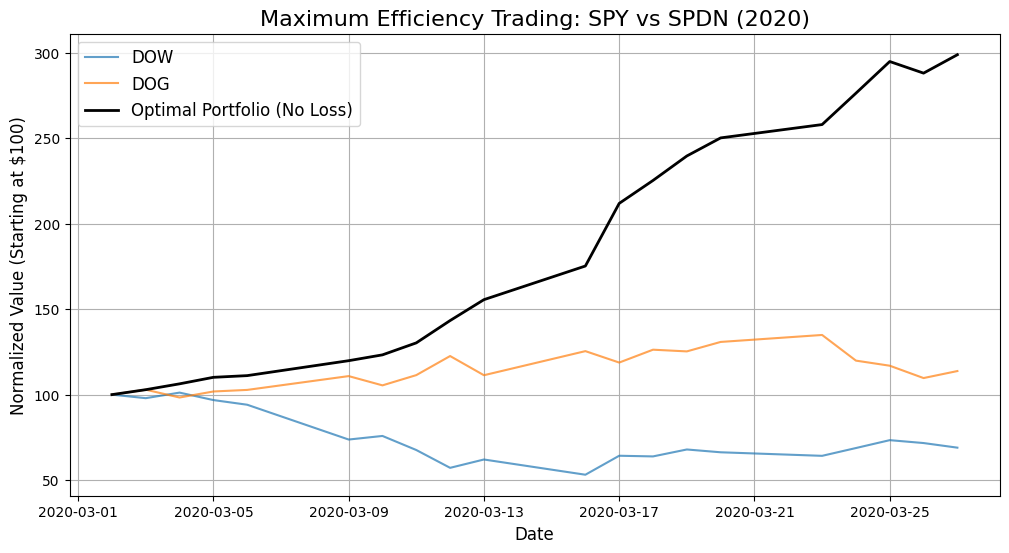

In [8]:
# Plot the performance
plt.figure(figsize=(12, 6))
plt.plot(comparison_df["DOW"], label="DOW", alpha=0.7)
plt.plot(comparison_df["DOG"], label="DOG", alpha=0.7)
plt.plot(comparison_df["Optimal Portfolio"], label="Optimal Portfolio (No Loss)", linewidth=2, color="black")

plt.title("Maximum Efficiency Trading: SPY vs SPDN (2020)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Value (Starting at $100)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
